In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f'train shape => {train.shape}')
print(f'test shape => {test.shape}')

train shape => (7613, 5)
test shape => (3263, 4)


In [3]:
train.sample(5)

,id,keyword,location,text,target
4079,5798,hail,NaN,Thank you so so much to everyone for posting t...,0
3005,4318,dust%20storm,"Marrakech MÌ©dina, Marrakech - Tensift - Al Haouz",There's a big storm brewing dark clouds thunde...,1
4542,6458,injured,london,Udhampur terror attack: Militants attack polic...,1
1494,2154,catastrophe,NaN,Human history becomes more and more a race bet...,0
4168,5921,harm,Kansas City,@5hvzlaRadio Love what you picked! We're playi...,0


In [4]:
test.sample(5)

,id,keyword,location,text
2486,8305,rubble,Diantara Temlen Laksani,RT PemantauJKT48: China's Stock Market Crash: ...
644,2104,casualty,Toronto #6ixSideMafia,@Vpzedd reach skype
170,554,arson,West Michigan,@pnuts_mama Be strong. It's at times like this...
2767,9199,suicide%20bombing,NaN,AFP: #PKK said it carried out suicide bombing ...
1123,3707,destroyed,Chicago,poor dude...he needs him some valerie...lol RT...


## Describe

In [5]:
train.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


En *keyword* hay 7552 elementos no nulos, 221 palabras unicas donde *fatalities* es el mas repetido con 45 repeticiones.
Las otras colunmas son similares

In [6]:
test.describe(include=['O'])

,keyword,location,text
count,3237,2158,3263
unique,221,1602,3243
top,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,23,38,3


## Missing data

In [7]:
def missing_values(data: pd.DataFrame) -> pd.DataFrame:
    miss_value_percent = data.isna().sum() / data.shape[0] * 100
    return pd.DataFrame(miss_value_percent, columns=['Missing_percent']).query('Missing_percent > 0')

In [8]:
missing_values(train)

,Missing_percent
keyword,0.801261
location,33.272035


En *keyword* hay un 0.8% de valores nulos y en *location* hay un 33.27% valores nulos

In [9]:
missing_values(test)

,Missing_percent
keyword,0.796813
location,33.864542


## Distribution of the target variable

Text(0, 0.5, 'Samples')

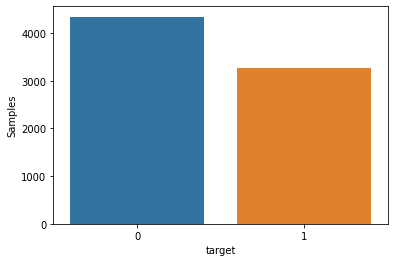

In [10]:
sns.countplot(train.target)
plt.ylabel('Samples')

## Examples tweets

In [11]:
train.query('target == 0')['text'].values[:5]

array(["What's up man?", 'I love fruits', 'Summer is lovely',
       'My car is so fast', 'What a goooooooaaaaaal!!!!!!'], dtype=object)

In [12]:
train.query('target == 1')['text'].values[:5]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California ',
       'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '],
      dtype=object)

## Distribution of the target variable

In [13]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width()) 
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [14]:
def barplot(data, title):
    plt.figure(figsize=(10,8))
    plt.title(title)
    size = len(train[train['location'].notna()])
    p = sns.barplot(y=data['location'].value_counts().index[:20], 
            x=data['location'].value_counts()[:20])       
    show_values(p, orient='h')

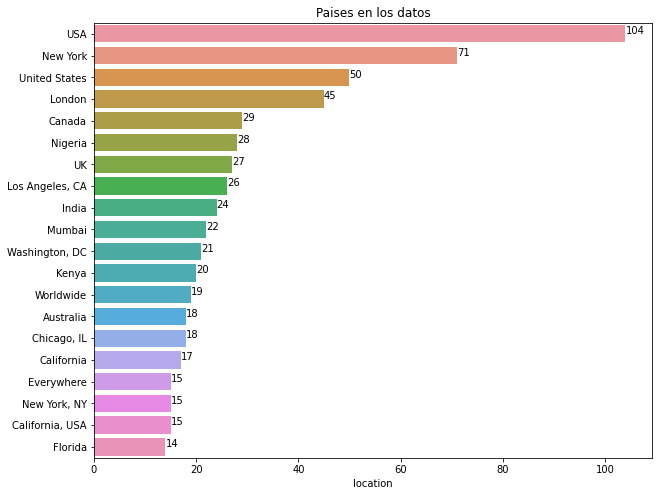

In [15]:
barplot(train, 'Paises en los datos')

In [16]:
train_1 = train[train['target'] == 1]
train_0 = train[train['target'] == 0]

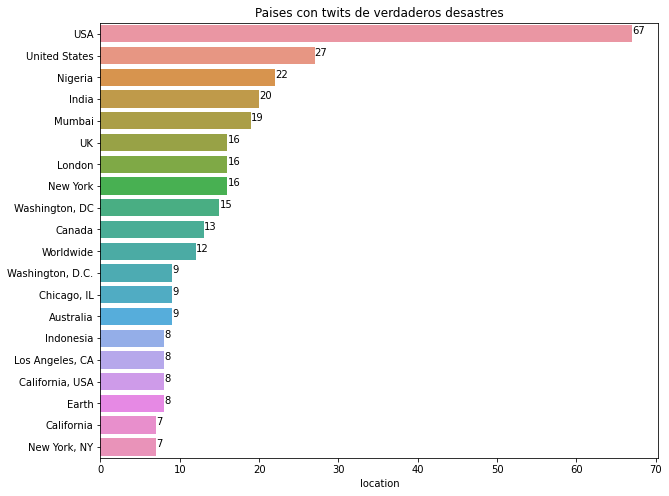

In [17]:
barplot(train_1, 'Paises con twits de verdaderos desastres')

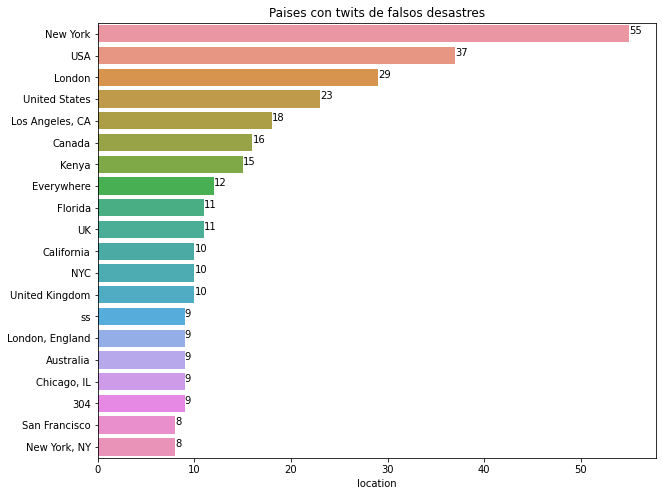

In [18]:
barplot(train_0, 'Paises con twits de falsos desastres')

#### Numero de caracteres en los tweets

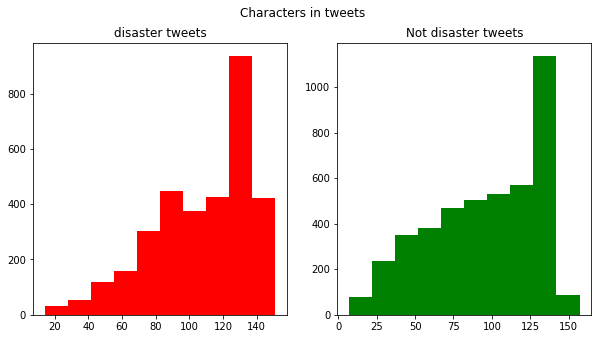

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

La distribución de ambos parece ser casi la misma. 120 a 140 caracteres en un tweet son los más comunes entre ambos

#### Numero de palabras en un tweet

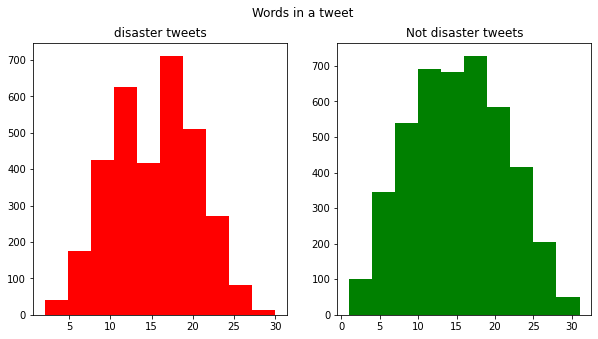

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

#### Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each tweet')

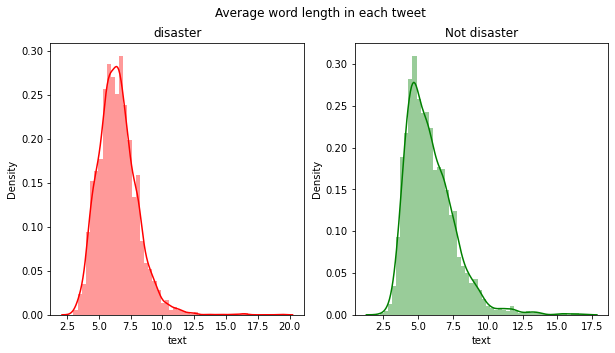

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')